# Wrangle & Analyze Data 
### (WeRateDogs Twitter Archive)

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>    
    <ul>
            <li><a href="#gather">Gathering Data</a></li>
            <li><a href="#assess">Assessing Data</a></li>
            <li><a href="#clean">Cleaning Data</a></li>
    </ul>
<li><a href="#analyze">Storing, Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset which will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. I will use Python (and its libraries) to analyze and vusualize the dataset through jupyter notebook. 

In [160]:
#import library
import pandas as pd
import numpy as np
import requests
import os
import time

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns


<a id='wrangle'></a>
# Data Wrangling
<a id='gather'></a>
## Gathering Data
> <b>In this part, we will gather three parts of data</b>
<ol>
    <li>The WeRateDogs Twitter archive. Downloading the file named twitter-archive-enhanced.csv</li>
    <li>The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv</li>
    <li>Each tweet's retweet count and favorite ("like") count at minimum. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.</li>
</ol>

<b>Step 1. Importing Twitter Archieve File</b>

In [193]:
#import csv file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<b>Step 2. Programatically Download Tweet Image Predictions TSV</b>

In [194]:
#using requests library to download tweet image prediction tsv and store it as image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
df_img = pd.read_csv('image_predictions.tsv', sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<b>Step 3. Downloading Tweet JSON Data</b>

In [195]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

In [196]:
# read json txt file and save as a df
tw_json = []

with open('tweet-json.txt', 'r') as json_data:
    #make a loop to read file
    line = json_data.readline()
    while line:
        status = json.loads(line)

        # extract variable 
        status_id = status['id']
        status_ret_count = status['retweet_count']
        status_fav_count = status['favorite_count']
        
        # make a dictionary
        json_file = {'tweet_id': status_id, 
                     'retweet_count': status_ret_count, 
                     'favorite_count': status_fav_count
                    }
        tw_json.append(json_file)

        # read next line
        line = json_data.readline()

#convert the dictionary list to a df
df_json = pd.DataFrame(tw_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
# Assessing Data
> <b>After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues.</b> 

>Using two types of assessment: 
>1. Visual assessment: scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).
>2. Programmatic assessment: using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).


<ul>
<li><a href="#quality"><b>Quality Issues</b></a> -- issues with content. Low quality data is also known as dirty data.</li>

<li><a href="#tidy"><b>Tidiness Issues</b></a> -- issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:</li>
    <ol>
        <li>Each variable forms a column.</li>
        <li>Each observation forms a row.</li>
        <li>Each type of observational unit forms a table.</li>
    </ol>
</ul>

<b>Step 1. Assessing Twitter Archive File</b>

In [197]:
#print out the head()
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [198]:
df_archive.shape

(2356, 17)

In [199]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are 2356 rows and 17 columns. 
From the info above, we found that six columns have missing values including 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

In [200]:
#check with in_reply_to_status_id column
df_archive.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [201]:
type(df_archive['tweet_id'][0])

numpy.int64

In [202]:
type(df_archive['in_reply_to_status_id'][1])

numpy.float64

In [203]:
type(df_archive['in_reply_to_user_id'][1])

numpy.float64

In [204]:
type(df_archive['retweeted_status_id'][1])

numpy.float64

In [205]:
type(df_archive['retweeted_status_user_id'][1])

numpy.float64

<b>Problem #1: The format of id is wrong and it should be changed to integer.</b>

In [206]:
#check column rating_numerator
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [207]:
df_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [208]:
#check column rating_denominator
df_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [209]:
df_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

<b>Problem #2: The rating denominator could only be 10 and other values are invalid.</b>

In [210]:
#check timestamp column
df_archive['timestamp'].value_counts()

2016-04-23 22:38:43 +0000    1
2015-11-16 01:52:02 +0000    1
2017-05-28 01:26:04 +0000    1
2016-09-03 19:23:13 +0000    1
2016-11-22 18:17:08 +0000    1
                            ..
2016-08-30 00:14:12 +0000    1
2016-12-12 00:29:28 +0000    1
2015-12-04 01:42:26 +0000    1
2015-12-18 03:11:30 +0000    1
2017-04-22 18:31:02 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [211]:
type(df_archive['timestamp'][0])               

str

In [212]:
df_archive['retweeted_status_timestamp'].value_counts()

2016-01-08 05:00:14 +0000    1
2015-12-30 06:37:25 +0000    1
2015-12-23 00:45:35 +0000    1
2017-02-16 23:23:38 +0000    1
2016-11-01 03:00:09 +0000    1
                            ..
2017-06-09 16:22:42 +0000    1
2016-05-28 03:04:00 +0000    1
2016-08-23 21:09:14 +0000    1
2016-10-23 19:42:02 +0000    1
2016-07-13 23:48:51 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [213]:
type(df_archive['retweeted_status_timestamp'][0])  

float

<b>Problem #3: When we explore the type of two timestamp columns, one is string, the other one is float. The format of timestamp should be changed to datetime.</b>

In [214]:
df_archive.name.value_counts().sort_index(ascending = True)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
               ..
such            1
the             8
this            1
unacceptable    1
very            5
Name: name, Length: 957, dtype: int64

In [215]:
#collect all error names 
error_name = df_archive.name.str.contains('^[a-z]', regex = True)
df_archive[error_name].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [216]:
len(df_archive[error_name])

109

<b>Problem #4: There are 109 invalid names not starting with a capitalized alphabet.</b>

In [217]:
#check with four columns of dogs' stage
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [218]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [219]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [220]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

<b>Problem #5: The "None" value should be changed to "NaN" in these four columns.</b>

In [221]:
#show the number of retweet 
df_archive.retweeted_status_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [222]:
df_archive.retweeted_status_user_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

<b>Problem #6: As we do not want the duplicated information, so we would clear away the rows of retweet.</b>

In [891]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

<b>Problem #7: source name should be changed and moved the attached link. </b>

<b>Step 2. Tweet Image Predictions</b>

In [223]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [224]:
df_img.shape

(2075, 12)

In [225]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<b>Problem #8: There are 2075 rows and 12 columns. Based on Twitter Archive file (2356 rows), we know some pictures are missing.</b>

In [226]:
#check if id duplicate
df_img.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [227]:
##check if jpg duplicate
df_img.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

<b>Problem #9: There are 66 jpg_url which are duplicated.</b>

In [228]:
#check the image number column
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

Some people have posted more than one picture.

<b>Step 3. Checking JSON File</b>

In [229]:
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [230]:
df_json.shape

(2354, 3)

In [231]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [233]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [232]:
df_json.tweet_id.duplicated().value_counts()

False    2354
Name: tweet_id, dtype: int64

In [240]:
df_json['tweet_id'].nunique()

2354

There are 2354 rows and 3 columns. No null variables. No duplicated tweet id.

In [238]:
type(df_json['tweet_id'][0])

numpy.int64

In [236]:
type(df_json['retweet_count'][0])

numpy.int64

In [237]:
type(df_json['favorite_count'][0])

numpy.int64

The format of variable is correct.

<a id='quality'></a>
# Summary
## Quality Issue
<b>Twitter Archive File</b>
<ol>
    <li>The format of id is wrong and it should be changed to integer.</li>
    <li>The rating denominator could only be 10 and other values are invalid.</li>
    <li>When we explore the type of two timestamp columns, one is string, the other one is float. The format of timestamp should be changed to datetime.</li>
    <li>There are 109 invalid names not starting with a capitalized alphabet.</li>
    <li>In four columns of dog's stage, the "None" value should be changed to "NaN" in these four columns.</li>
    <li>As we do not want the duplicated information, so we would clear away the rows of retweet based on retweet id.</li>
    <li>Change the value for source column.</li>
</ol>

<b>Tweet Image Predictions TSV</b>
<ul>
    <li>There are 2075 rows in prediction file, 2354 rows in JSON data. Based on Twitter Archive file (2356 rows), we know some rows are not matching.</li>
    <li>There are 66 jpg_url which are duplicated.</li>
</ul>

<b>JSON File</b>
<ul>
    <li>No quality issue for the json file.</li>
</ul>


<a id='tidy'></a>
## Tidiness Issue
<ul>
    <li>df_archive could drop empty columns of retweet infomation like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.</li>
    <li>The four columns of dog's stage should be merged into one column.</li>
    <li>Merging JSON file, df_archive dataframe and img file into one.</li>
</ul>


<a id='clean'></a>
## Cleaning Data
> <b>Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook.</b>

>The issues that satisfy the Project Motivation must be cleaned:
>1. Cleaning includes merging individual pieces of data according to the rules of tidy data.
>2. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

### Dealing with tidiness issue
#### 1. Drop the columns we do not use

In [1030]:
#make a copy of three data files
df_archive_clean = df_archive.copy()
df_img_clean = df_img.copy()
df_json_clean = df_json.copy()

In [1031]:
#drop useless columns
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [1032]:
#fill the null url
df_archive_clean.expanded_urls.head()

0                                                                    https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                    https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                    https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                    https://twitter.com/dog_rates/status/891689557279858688/photo/1
4    https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
Name: expanded_urls, dtype: object

In [1033]:
#the website url should be 'https://twitter.com/dog_rates/status/' plus their id, so we could fill it
df_archive_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + df_archive_clean.tweet_id.astype(str)

In [1034]:
#check with the df see if everything is fixed
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2356 non-null   int64  
 1   timestamp            2356 non-null   object 
 2   source               2356 non-null   object 
 3   text                 2356 non-null   object 
 4   retweeted_status_id  181 non-null    float64
 5   expanded_urls        2356 non-null   object 
 6   rating_numerator     2356 non-null   int64  
 7   rating_denominator   2356 non-null   int64  
 8   name                 2356 non-null   object 
 9   doggo                2356 non-null   object 
 10  floofer              2356 non-null   object 
 11  pupper               2356 non-null   object 
 12  puppo                2356 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 239.4+ KB


#### 2. Merge four columns of dog's stage into one

In [1035]:
#replace 'None' to ''
df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [1036]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,,,,


In [1037]:
#combine four columns to stage
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

In [1038]:
#drop other four stages columns
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [1039]:
df_archive_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [1040]:
#replace the null value and multiple stage
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('', np.nan)
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('doggopupper', 'multiple')
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('doggofloofer', 'multiple')
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('doggopuppo', 'multiple')

In [1041]:
#double check with our df
df_archive_clean.dog_stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stage, dtype: int64

#### 3. Merge three files into one

In [1089]:
master_clean = pd.merge(df_archive_clean, df_img_clean, on = 'tweet_id', how = 'inner')
master_clean = pd.merge(master_clean, df_json_clean, on = 'tweet_id', how = 'inner')

In [1090]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2073 non-null   int64  
 1   timestamp            2073 non-null   object 
 2   source               2073 non-null   object 
 3   text                 2073 non-null   object 
 4   retweeted_status_id  79 non-null     float64
 5   expanded_urls        2073 non-null   object 
 6   rating_numerator     2073 non-null   int64  
 7   rating_denominator   2073 non-null   int64  
 8   name                 2073 non-null   object 
 9   dog_stage            320 non-null    object 
 10  jpg_url              2073 non-null   object 
 11  img_num              2073 non-null   int64  
 12  p1                   2073 non-null   object 
 13  p1_conf              2073 non-null   float64
 14  p1_dog               2073 non-null   bool   
 15  p2                   2073 non-null   o

### Dealing with quality issue
#### 1. change data format and drop the retweet rows

In [1091]:
#change timestamp format from string to datetime
master_clean.timestamp = pd.to_datetime(master_clean.timestamp)

In [1092]:
#change id format from float to int
id_clean = master_clean.retweeted_status_id
id_clean = id_clean.dropna()
id_clean = id_clean.astype('int64')

In [1093]:
#drop the retweet rows
master_clean = master_clean.drop(master_clean[master_clean.retweeted_status_id.apply(lambda x : x in id_clean.values)].index.values, axis = 0)
master_clean = master_clean.drop('retweeted_status_id', axis=1)

In [1094]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   dog_stage           306 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   int64              
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

#### 2. fix the rating part

In [1095]:
# rating_denominator should be 10.
master_clean.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [1096]:
#check those rating_denominator is not equal to 10
pd.set_option('display.max_colwidth', 150)
master_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
734,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
924,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [1097]:
master_clean.query('rating_denominator != 10').shape[0]

18

In [1098]:
#find the error rating and fix it
#740373189193256964(14/10);722974582966214656(13/10);716439118184652801(11/10);666287406224695296(9/10);682962037429899265(10/10);
master_clean.loc[master_clean.tweet_id == 740373189193256964, 'rating_numerator':'rating_denominator'] = [14, 10]
master_clean.loc[master_clean.tweet_id == 722974582966214656, 'rating_numerator':'rating_denominator'] = [13, 10]
master_clean.loc[master_clean.tweet_id == 716439118184652801, 'rating_numerator':'rating_denominator'] = [11, 10]
master_clean.loc[master_clean.tweet_id == 666287406224695296, 'rating_numerator':'rating_denominator'] = [9, 10]
master_clean.loc[master_clean.tweet_id == 682962037429899265, 'rating_numerator':'rating_denominator'] = [10, 10]

In [1099]:
#number of rows that rating denominator is not equal to 10
master_clean.query('rating_denominator != 10').shape[0]

13

In [1100]:
master_clean[['text', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,text,rating_numerator,rating_denominator
345,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
415,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
734,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
924,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1022,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1047,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1065,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1131,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1207,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1379,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130


In [1101]:
#drop all the rows above
master_clean = master_clean.drop([345, 415, 734, 924, 1022, 1047, 1065, 1131, 1207, 1379, 1380, 1512, 1571], axis = 0)

In [1102]:
master_clean.query('rating_denominator != 10').shape[0] #the rows are droped

0

In [1103]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source              1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           306 non-null    object             
 9   jpg_url             1981 non-null   object             
 10  img_num             1981 non-null   int64              
 11  p1                  1981 non-null   object             
 12  p1_conf             1981 non-null 

#### 3. replace those invalid names to 'None'

In [1104]:
master_clean.reset_index(drop=True, inplace=True)

In [1105]:
error_name = master_clean.name.str.contains('^[a-z]', regex = True)
master_clean[error_name].name.value_counts().sort_index()

a               54
actually         1
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
light            1
my               1
not              1
officially       1
one              4
quite            3
space            1
such             1
the              7
unacceptable     1
very             4
Name: name, dtype: int64

In [1106]:
#change name to 'None'
save = []
counter = 0
for i in master_clean.name:
    
    if error_name[counter] == False:
        save.append(i)
    else:
        save.append('None')
    counter += 1

In [1107]:
master_clean.name = np.array(save)

In [1108]:
master_clean.name.value_counts()

None        632
Charlie      11
Lucy         10
Oliver       10
Cooper       10
           ... 
Willy         1
Clarq         1
Creg          1
Kulet         1
Ralphson      1
Name: name, Length: 914, dtype: int64

#### 4. creat a new column called 'breed' and if p1 confidence >= 95% and p1_dog is True or p2 confidence <= 1% and p2_dog is True,  then put the predicted breed into breed column

In [1109]:
#create breed column
master_clean['breed'] = 'None'

In [1110]:
master_clean.breed.value_counts()

None    1981
Name: breed, dtype: int64

In [1111]:
#put all right category into breed
save = []
for i in range(master_clean.breed.shape[0]):
    if master_clean.p1_conf.iloc[i] >= 0.95 and master_clean.p1_dog.iloc[i]:
        save.append(master_clean.p1.iloc[i])
    elif master_clean.p2_conf.iloc[i] <= 0.01 and master_clean.p2_dog.iloc[i]:
        save.append(master_clean.p2.iloc[i])   
    else:
        save.append('Unsure')

In [1112]:
master_clean['breed'] = np.array(save)

In [1113]:
#format the breed names
master_clean['breed'] = master_clean.breed.str.capitalize().str.replace('_',' ')

In [1114]:
master_clean.breed.value_counts()

Unsure                         1781
Pug                              21
Samoyed                          19
Pembroke                         19
Golden retriever                 18
Pomeranian                       13
Chihuahua                        12
Labrador retriever                9
French bulldog                    8
Chow                              7
Bernese mountain dog              4
Basset                            4
German shepherd                   4
Shetland sheepdog                 4
Old english sheepdog              3
Pekinese                          3
Beagle                            3
Blenheim spaniel                  3
English springer                  2
Komondor                          2
Vizsla                            2
Toy poodle                        2
Keeshond                          2
Dalmatian                         2
Boston bull                       2
Malamute                          2
Bull mastiff                      2
Cocker spaniel              

#### 5. drop p1/p2/p3 columns

In [1115]:
#drop p2 p3 columns
master_clean = master_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)

In [1116]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1981 non-null   int64              
 1   timestamp           1981 non-null   datetime64[ns, UTC]
 2   source              1981 non-null   object             
 3   text                1981 non-null   object             
 4   expanded_urls       1981 non-null   object             
 5   rating_numerator    1981 non-null   int64              
 6   rating_denominator  1981 non-null   int64              
 7   name                1981 non-null   object             
 8   dog_stage           306 non-null    object             
 9   jpg_url             1981 non-null   object             
 10  img_num             1981 non-null   int64              
 11  retweet_count       1981 non-null   int64              
 12  favorite_count      1981 non-null 

#### 6. rename source column

In [1117]:
master_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1942
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1118]:
master_clean3 = master_clean

In [1119]:
master_clean3['source'] = master_clean3.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'Twitter for Iphone',
                                                        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client', 
                                                        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
                                                       })    
                                                      
                                                      
                                                      
                                                      

In [1120]:
master_clean3.source.value_counts()

Twitter for Iphone    1942
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

<a id='analyze'></a>
## Storing, Analyzing and Visualizing Data
> <b>Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate).Then analyze and visualize the wrangled data. </b>
<ul>
<li><a href="#insight">Insights</a> </li>
<li><a href="#visual">Visualization</a></li>
</ul>

<b>Storing</b>

In [1245]:
master_clean.to_csv('twitter_archive_master.csv')
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,retweet_count,favorite_count,breed
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for Iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,8853,39467,Unsure
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for Iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",https://twitter.com/dog_rates/status/892177421306343426,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,6514,33819,Unsure
2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,4328,25461,Unsure
3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for Iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,8964,42908,Unsure
4,4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for Iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",https://twitter.com/dog_rates/status/891327558926688256,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,9774,41048,Unsure


<a id='insight'></a>
## Insights
### Q1: Which dog has highest retweet counts?


In [1246]:
twitter_archive_master.sort_values(by = 'retweet_count', ascending = False).iloc[0]

Unnamed: 0                                                                                                                            772
tweet_id                                                                                                               744234799360020481
timestamp                                                                                                       2016-06-18 18:26:18+00:00
source                                                                                                                 Twitter for Iphone
text                  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
expanded_urls                                                                     https://twitter.com/dog_rates/status/744234799360020481
rating_numerator                                                                                                                       13
rating_denominator                

The dog has highest retweet counts. Its stage is doggo. The pose retweeted 79515 times and received 131075 favorite counts. 

### Q2: Which dog receive most favorite counts?

In [1134]:
twitter_archive_master.sort_values(by = 'favorite_count', ascending = False).iloc[0]

Unnamed: 0                                                                                                                        309
tweet_id                                                                                                           822872901745569793
timestamp                                                                                                   2017-01-21 18:26:02+00:00
source                                                                                                             Twitter for Iphone
text                  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
expanded_urls                                                                 https://twitter.com/dog_rates/status/822872901745569793
rating_numerator                                                                                                                   13
rating_denominator                                            

The dog has most favorite counts, its stage is puppo. The pose retweeted 48265 times and received 132810 favorite counts. 

### Q3: What way do users most  use to log in WeRateDog?

In [1216]:
twitter_archive_master.source.value_counts()

Twitter for Iphone    1942
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [1222]:
#calculate the proportion
twitter_archive_master.source.value_counts().iloc[0]/twitter_archive_master.shape[0]

0.9803129732458354

98% of the WeRateDog users like to use Twitter through iPhone. 

### Q4: What is the relation between retweet counts and favorite counts?

In [1235]:
twitter_archive_master.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1981.000000,1.981000e+03,1981.000000,1981.0,1981.000000,1981.000000,1981.000000
mean,990.000000,7.359454e+17,11.697627,10.0,1.203433,2775.583039,8925.846542
std,572.009761,6.758726e+16,40.799744,0.0,0.561841,4688.220355,12245.289938
min,0.000000,6.660209e+17,0.000000,10.0,1.000000,16.000000,81.000000
25%,495.000000,6.757984e+17,10.000000,10.0,1.000000,622.000000,1957.000000
50%,990.000000,7.084699e+17,11.000000,10.0,1.000000,1359.000000,4144.000000
75%,1485.000000,7.880396e+17,12.000000,10.0,1.000000,3225.000000,11363.000000
max,1980.000000,8.924206e+17,1776.000000,10.0,4.000000,79515.000000,132810.000000


In [1239]:
twitter_archive_master.retweet_count.mean()

2775.583038869258

In [1240]:
twitter_archive_master.favorite_count.mean()

8925.84654215043

In [1238]:
twitter_archive_master.favorite_count.mean()/twitter_archive_master.retweet_count.mean()

3.215845614111665

The mean of retweet counts is 27775.6, the mean of favorite counts is 8925.8. And the the favorite counts are as three times as many as the retweet counts. It means that people would always thump up for a pose, but they might not retweet it.

<a id='visual'></a>
## Visualization
### #1. What is the most popular dog breed?

In [1178]:
#see the value of breed
twitter_archive_master.breed.value_counts()

Unsure                         1781
Pug                              21
Samoyed                          19
Pembroke                         19
Golden retriever                 18
Pomeranian                       13
Chihuahua                        12
Labrador retriever                9
French bulldog                    8
Chow                              7
Bernese mountain dog              4
Basset                            4
German shepherd                   4
Shetland sheepdog                 4
Old english sheepdog              3
Pekinese                          3
Beagle                            3
Blenheim spaniel                  3
English springer                  2
Komondor                          2
Vizsla                            2
Toy poodle                        2
Keeshond                          2
Dalmatian                         2
Boston bull                       2
Malamute                          2
Bull mastiff                      2
Cocker spaniel              

In [1244]:
#total dog breed (without unsure)
twitter_archive_master.breed.value_counts().shape[0] - 1

50

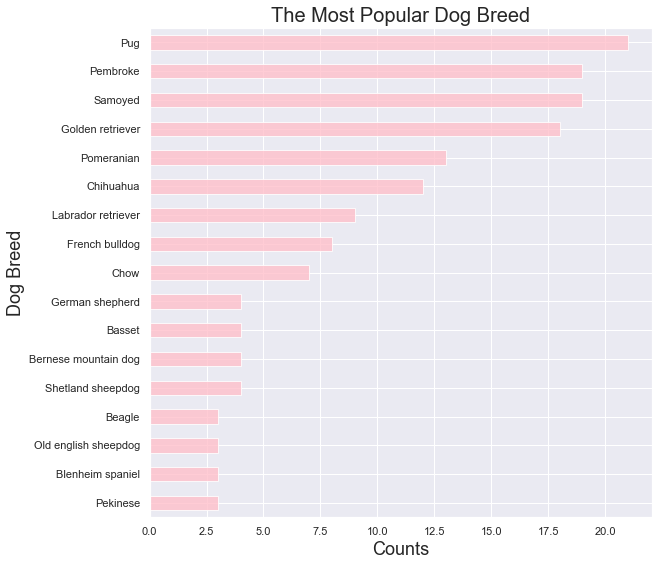

In [1215]:
#create a bar chart to find popular dog breed
plt.figure(figsize = (9, 9))
breed_filter=twitter_archive_master.groupby('breed').filter(lambda x: len(x) >= 3 and len(x) <= 100)
breed_filter['breed'].value_counts(ascending=True).plot(kind = 'barh', alpha = 0.8, color = 'pink')

plt.title('The Most Popular Dog Breed', fontsize=20)
plt.xlabel('Counts',fontsize=18)
plt.ylabel('Dog Breed',fontsize=18);

Through this chart, the most popular dog breed is Pug with 21 counts. The second popular dog breeds are Pembroke and Samoyed with 19 counts. The third is  Golden retriever with 18 counts. The dog breed has 50 categories in total. 

### #2. What is the proportion of dog stages? And what's the relation between favorite counts and its dog stage?

In [1142]:
twitter_archive_master.dog_stage.value_counts()

pupper      203
doggo        63
puppo        22
multiple     11
floofer       7
Name: dog_stage, dtype: int64

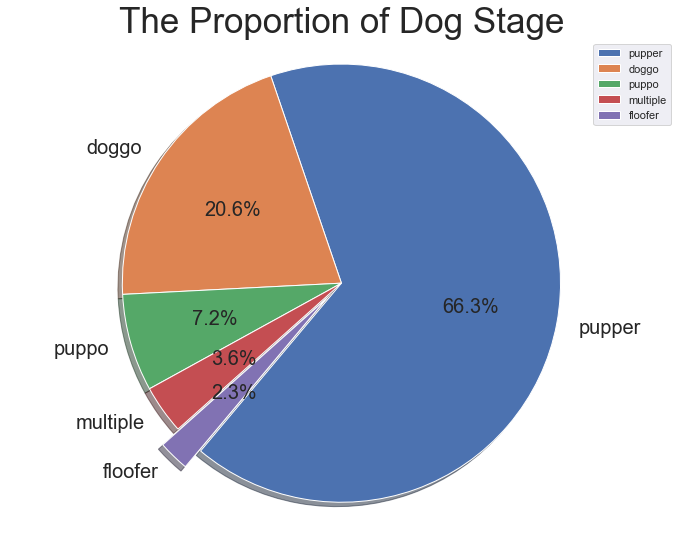

In [1203]:
#create a pie chart
plt.figure(figsize=(12,9))
sns.set(style='darkgrid')
name = twitter_archive_master['dog_stage'].value_counts()
explode = (0, 0, 0, 0, 0.1)
plt.pie(name, explode, labels = name.index, shadow=True, textprops={'fontsize': 20}, autopct='%1.1f%%', startangle = 230)
plt.axis('equal') 

plt.title('The Proportion of Dog Stage', fontsize=35)
plt.legend();

In [1171]:
#calculate the average favorite counts based on dog stage
avg_fav = twitter_archive_master.groupby('dog_stage').favorite_count.mean()
avg_fav

dog_stage
doggo       19356.380952
floofer     13206.000000
multiple    16164.636364
pupper       7197.738916
puppo       21582.090909
Name: favorite_count, dtype: float64

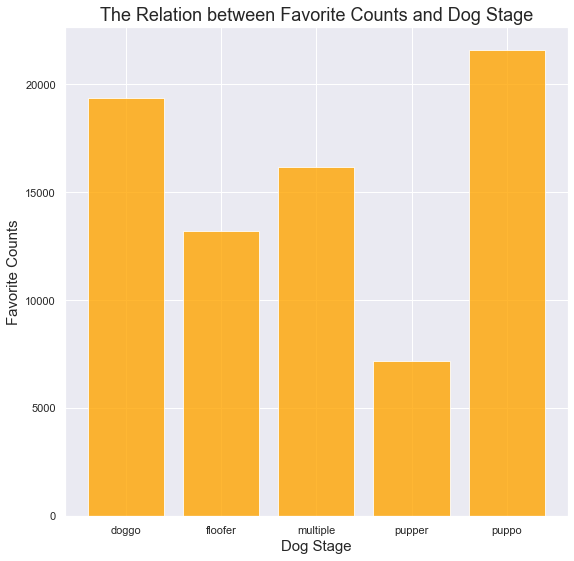

In [1200]:
#create a bar chart to represent the relation between fav_counts and dog_stage
plt.figure(figsize = (9, 9))
plt.bar(avg_fav.index.values, avg_fav, color = 'orange', alpha = 0.8)
plt.title('The Relation between Favorite Counts and Dog Stage', fontsize=18)
plt.xlabel('Dog Stage', fontsize=15)
plt.ylabel('Favorite Counts', fontsize=15);

Based on the pie chart, the largest proportion of dog stage is pupper accounting for 66.3%, and the less of it is floofer with 2.3%. But from the bar chart, the pupper receives less favorite counts. The dog stage which gets most of favorite counts is puppo, puppo is only 7.2% of all dog stage. The floofer receives average 13206 favorite counts which is the second largest proportion of receiving favorite counts. So, the relation between favorite counts and dog stage number has not positive relationship.